In [1]:
import pandas as pd
import numpy as np
import requests
import re
import nltk
from nltk.corpus import stopwords
import string

import summa
from summa import summarizer

from nltk import tokenize

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stopword=nltk.corpus.stopwords.words('english')
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
data=pd.read_csv("train.csv")
dat=pd.read_csv("test.csv")
data.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [5]:
def rem_p(text):
    text_nopu="".join([char for char in text if char not in string.punctuation])
    return text_nopu
data['text_clean']=data['text'].apply(lambda x:rem_p(x))
dat['text_clean']=dat['text'].apply(lambda x:rem_p(x))
data.head()

,unique_hash,text,drug,sentiment,text_clean
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,Autoimmune diseases tend to come in clusters A...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,I can completely understand why you’d want to ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,Interesting that it only targets S1P15 recepto...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,Very interesting grand merci Now I wonder wher...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,Hi everybody My latest MRI results for Brain a...


In [6]:
def tokenize(text):
    tokens =re.split('\W+',text)
    return tokens
data['text_token']=data['text_clean'].apply(lambda x:tokenize(x.lower()))
dat['text_token']=dat['text_clean'].apply(lambda x:tokenize(x.lower()))
data.head()

,unique_hash,text,drug,sentiment,text_clean,text_token
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,Autoimmune diseases tend to come in clusters A...,"[autoimmune, diseases, tend, to, come, in, clu..."
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,I can completely understand why you’d want to ...,"[i, can, completely, understand, why, you, d, ..."
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,Interesting that it only targets S1P15 recepto...,"[interesting, that, it, only, targets, s1p15, ..."
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,Very interesting grand merci Now I wonder wher...,"[very, interesting, grand, merci, now, i, wond..."
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,Hi everybody My latest MRI results for Brain a...,"[hi, everybody, my, latest, mri, results, for,..."


In [7]:
def rem_stop(tokenized_list):
    text=[word for word in tokenized_list if word not in stopword]
    return text
data['text_nostop']=data['text_token'].apply(lambda x:rem_stop(x))
dat['text_nostop']=dat['text_token'].apply(lambda x:rem_stop(x))
data.head()

,unique_hash,text,drug,sentiment,text_clean,text_token,text_nostop
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,Autoimmune diseases tend to come in clusters A...,"[autoimmune, diseases, tend, to, come, in, clu...","[autoimmune, diseases, tend, come, clusters, g..."
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,I can completely understand why you’d want to ...,"[i, can, completely, understand, why, you, d, ...","[completely, understand, want, try, results, r..."
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,Interesting that it only targets S1P15 recepto...,"[interesting, that, it, only, targets, s1p15, ...","[interesting, targets, s1p15, receptors, rathe..."
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,Very interesting grand merci Now I wonder wher...,"[very, interesting, grand, merci, now, i, wond...","[interesting, grand, merci, wonder, lemtrada, ..."
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,Hi everybody My latest MRI results for Brain a...,"[hi, everybody, my, latest, mri, results, for,...","[hi, everybody, latest, mri, results, brain, c..."


In [8]:
ps=nltk.PorterStemmer()
def stemming(to_text):
    text=[ps.stem(word) for word in to_text]
    return text
data['text_stem']=data['text_nostop'].apply(lambda x:stemming(x))
dat['text_stem']=dat['text_nostop'].apply(lambda x:stemming(x))
data.head()

,unique_hash,text,drug,sentiment,text_clean,text_token,text_nostop,text_stem
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,Autoimmune diseases tend to come in clusters A...,"[autoimmune, diseases, tend, to, come, in, clu...","[autoimmune, diseases, tend, come, clusters, g...","[autoimmun, diseas, tend, come, cluster, gilen..."
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,I can completely understand why you’d want to ...,"[i, can, completely, understand, why, you, d, ...","[completely, understand, want, try, results, r...","[complet, understand, want, tri, result, repor..."
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,Interesting that it only targets S1P15 recepto...,"[interesting, that, it, only, targets, s1p15, ...","[interesting, targets, s1p15, receptors, rathe...","[interest, target, s1p15, receptor, rather, 15..."
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,Very interesting grand merci Now I wonder wher...,"[very, interesting, grand, merci, now, i, wond...","[interesting, grand, merci, wonder, lemtrada, ...","[interest, grand, merci, wonder, lemtrada, ocr..."
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,Hi everybody My latest MRI results for Brain a...,"[hi, everybody, my, latest, mri, results, for,...","[hi, everybody, latest, mri, results, brain, c...","[hi, everybodi, latest, mri, result, brain, ce..."


In [9]:
wn = nltk.WordNetLemmatizer()
def lem(to_text):
    text=[wn.lemmatize(word) for word in to_text]
    return text
data['text_lemma']=data['text_nostop'].apply(lambda x:lem(x))
dat['text_lemma']=dat['text_nostop'].apply(lambda x:lem(x))
data.head()

,unique_hash,text,drug,sentiment,text_clean,text_token,text_nostop,text_stem,text_lemma
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,Autoimmune diseases tend to come in clusters A...,"[autoimmune, diseases, tend, to, come, in, clu...","[autoimmune, diseases, tend, come, clusters, g...","[autoimmun, diseas, tend, come, cluster, gilen...","[autoimmune, disease, tend, come, cluster, gil..."
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,I can completely understand why you’d want to ...,"[i, can, completely, understand, why, you, d, ...","[completely, understand, want, try, results, r...","[complet, understand, want, tri, result, repor...","[completely, understand, want, try, result, re..."
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,Interesting that it only targets S1P15 recepto...,"[interesting, that, it, only, targets, s1p15, ...","[interesting, targets, s1p15, receptors, rathe...","[interest, target, s1p15, receptor, rather, 15...","[interesting, target, s1p15, receptor, rather,..."
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,Very interesting grand merci Now I wonder wher...,"[very, interesting, grand, merci, now, i, wond...","[interesting, grand, merci, wonder, lemtrada, ...","[interest, grand, merci, wonder, lemtrada, ocr...","[interesting, grand, merci, wonder, lemtrada, ..."
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,Hi everybody My latest MRI results for Brain a...,"[hi, everybody, my, latest, mri, results, for,...","[hi, everybody, latest, mri, results, brain, c...","[hi, everybodi, latest, mri, result, brain, ce...","[hi, everybody, latest, mri, result, brain, ce..."


In [10]:
dat.head()

,unique_hash,text,drug,text_clean,text_token,text_nostop,text_stem,text_lemma
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,256 previously stable on natalizumab with 55 s...,"[256, previously, stable, on, natalizumab, wit...","[256, previously, stable, natalizumab, 55, swi...","[256, previous, stabl, natalizumab, 55, switch...","[256, previously, stable, natalizumab, 55, swi..."
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod,On fingolimod and have been since December 201...,"[on, fingolimod, and, have, been, since, decem...","[fingolimod, since, december, 2015, way, descr...","[fingolimod, sinc, decemb, 2015, way, describ,...","[fingolimod, since, december, 2015, way, descr..."
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira,Apparently its shingles I do have a few red s...,"[apparently, its, shingles, i, do, have, a, fe...","[apparently, shingles, red, spots, left, breas...","[appar, shingl, red, spot, left, breast, appea...","[apparently, shingle, red, spot, left, breast,..."
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso,If the Docetaxel doing once a week x3 weeks th...,"[if, the, docetaxel, doing, once, a, week, x3,...","[docetaxel, week, x3, weeks, 1, week, claim, l...","[docetaxel, week, x3, week, 1, week, claim, le...","[docetaxel, week, x3, week, 1, week, claim, le..."
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara,CC Stelara worked in a matter of days for me I...,"[cc, stelara, worked, in, a, matter, of, days,...","[cc, stelara, worked, matter, days, gi, willin...","[cc, stelara, work, matter, day, gi, will, jum...","[cc, stelara, worked, matter, day, gi, willing..."


In [12]:
data.sentiment.value_counts() # here 0 represents positive, 1 represents negative, 2 represents neutral

2    3825
1     837
0     617
Name: sentiment, dtype: int64

In [13]:
sentiment_count=data.groupby('sentiment').count()

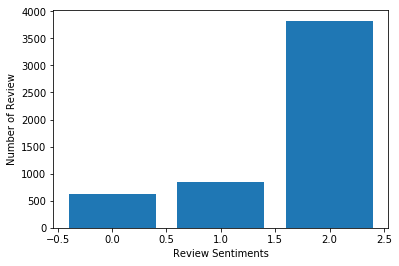

In [14]:
plt.bar(sentiment_count.index.values, sentiment_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [15]:
dat['sentiment']=3   # assigning any random value for sentiment of testing file
dat.shape

(2924, 9)

In [16]:
data.shape

(5279, 9)

In [18]:
result = pd.concat([data, dat])  #concatinating both the files

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [19]:
result

,drug,sentiment,text,text_clean,text_lemma,text_nostop,text_stem,text_token,unique_hash
0,gilenya,2,Autoimmune diseases tend to come in clusters. ...,Autoimmune diseases tend to come in clusters A...,"[autoimmune, disease, tend, come, cluster, gil...","[autoimmune, diseases, tend, come, clusters, g...","[autoimmun, diseas, tend, come, cluster, gilen...","[autoimmune, diseases, tend, to, come, in, clu...",2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0
1,gilenya,2,I can completely understand why you’d want to ...,I can completely understand why you’d want to ...,"[completely, understand, want, try, result, re...","[completely, understand, want, try, results, r...","[complet, understand, want, tri, result, repor...","[i, can, completely, understand, why, you, d, ...",9eba8f80e7e20f3a2f48685530748fbfa95943e4
2,fingolimod,2,Interesting that it only targets S1P-1/5 recep...,Interesting that it only targets S1P15 recepto...,"[interesting, target, s1p15, receptor, rather,...","[interesting, targets, s1p15, receptors, rathe...","[interest, target, s1p15, receptor, rather, 15...","[interesting, that, it, only, targets, s1p15, ...",fe809672251f6bd0d986e00380f48d047c7e7b76
3,ocrevus,2,"Very interesting, grand merci. Now I wonder wh...",Very interesting grand merci Now I wonder wher...,"[interesting, grand, merci, wonder, lemtrada, ...","[interesting, grand, merci, wonder, lemtrada, ...","[interest, grand, merci, wonder, lemtrada, ocr...","[very, interesting, grand, merci, now, i, wond...",bd22104dfa9ec80db4099523e03fae7a52735eb6
4,gilenya,1,"Hi everybody, My latest MRI results for Brain ...",Hi everybody My latest MRI results for Brain a...,"[hi, everybody, latest, mri, result, brain, ce...","[hi, everybody, latest, mri, results, brain, c...","[hi, everybodi, latest, mri, result, brain, ce...","[hi, everybody, my, latest, mri, results, for,...",b227688381f9b25e5b65109dd00f7f895e838249
5,cladribine,2,I can’t give you advice about Lemtrada because...,I can’t give you advice about Lemtrada because...,"[give, advice, lemtrada, chose, cladribine, th...","[give, advice, lemtrada, chose, cladribine, th...","[give, advic, lemtrada, chose, cladribin, thou...","[i, can, t, give, you, advice, about, lemtrada...",a043780c757966243779bf3c0d11bf6eef721971
6,humira,0,Reply posted for JessZidek. Hi Jess Sorry to r...,Reply posted for JessZidek Hi Jess Sorry to re...,"[reply, posted, jesszidek, hi, jess, sorry, re...","[reply, posted, jesszidek, hi, jess, sorry, re...","[repli, post, jesszidek, hi, jess, sorri, read...","[reply, posted, for, jesszidek, hi, jess, sorr...",be5a13376933a7f9bbf8e801c31691092f63260a
7,gilenya,2,Well as expected my Neurologist wants me to st...,Well as expected my Neurologist wants me to st...,"[well, expected, neurologist, want, start, tys...","[well, expected, neurologist, wants, start, ty...","[well, expect, neurologist, want, start, tysab...","[well, as, expected, my, neurologist, wants, m...",08c3c0c702fc97d290204b37798ac62005da5626
8,fingolimod,1,Why do you think that FIngolimod was such a mi...,Why do you think that FIngolimod was such a mi...,"[think, fingolimod, miserable, failure, progre...","[think, fingolimod, miserable, failure, progre...","[think, fingolimod, miser, failur, progress, m...","[why, do, you, think, that, fingolimod, was, s...",8fd3d7ad80791c9343e5cf8a83bd1adf6577d516
9,tagrisso,2,Thank you so much…I’m learning a lot here at G...,Thank you so much…I’m learning a lot here at G...,"[thank, much, learning, lot, grace, mentioned,...","[thank, much, learning, lot, grace, mentioned,...","[thank, much, learn, lot, grace, mention, husb...","[thank, you, so, much, i, m, learning, a, lot,...",793c5af7cc8332df17eb602247d886fbd1c80f89


In [21]:
result.iloc[5278:6000]

,drug,sentiment,text,text_clean,text_lemma,text_nostop,text_stem,text_token,unique_hash
5278,ocrevus,0,"Well, my MS appeared to be very mild for a num...",Well my MS appeared to be very mild for a numb...,"[well, m, appeared, mild, number, year, relaps...","[well, ms, appeared, mild, number, years, rela...","[well, ms, appear, mild, number, year, relaps,...","[well, my, ms, appeared, to, be, very, mild, f...",c29143e9c1c299847e437412649b5738d861b9d0
0,fingolimod,3,"256 (previously stable on natalizumab), with 5...",256 previously stable on natalizumab with 55 s...,"[256, previously, stable, natalizumab, 55, swi...","[256, previously, stable, natalizumab, 55, swi...","[256, previous, stabl, natalizumab, 55, switch...","[256, previously, stable, on, natalizumab, wit...",9e9a8166b84114aca147bf409f6f956635034c08
1,fingolimod,3,On fingolimod and have been since December 201...,On fingolimod and have been since December 201...,"[fingolimod, since, december, 2015, way, descr...","[fingolimod, since, december, 2015, way, descr...","[fingolimod, sinc, decemb, 2015, way, describ,...","[on, fingolimod, and, have, been, since, decem...",e747e6822c867571afe7b907b51f0f2ca67b0e1a
2,humira,3,Apparently it's shingles! :-/ I do have a few ...,Apparently its shingles I do have a few red s...,"[apparently, shingle, red, spot, left, breast,...","[apparently, shingles, red, spots, left, breas...","[appar, shingl, red, spot, left, breast, appea...","[apparently, its, shingles, i, do, have, a, fe...",50b6d851bcff4f35afe354937949e9948975adf7
3,tagrisso,3,If the Docetaxel doing once a week x3 weeks th...,If the Docetaxel doing once a week x3 weeks th...,"[docetaxel, week, x3, week, 1, week, claim, le...","[docetaxel, week, x3, weeks, 1, week, claim, l...","[docetaxel, week, x3, week, 1, week, claim, le...","[if, the, docetaxel, doing, once, a, week, x3,...",7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae
4,stelara,3,"CC, Stelara worked in a matter of days for me....",CC Stelara worked in a matter of days for me I...,"[cc, stelara, worked, matter, day, gi, willing...","[cc, stelara, worked, matter, days, gi, willin...","[cc, stelara, work, matter, day, gi, will, jum...","[cc, stelara, worked, in, a, matter, of, days,...",8b37d169dee5bdae27060949242fb54feb6a7f7f
5,stelara,3,"Janssen Biotech, Inc. has just received FDA ap...",Janssen Biotech Inc has just received FDA appr...,"[janssen, biotech, inc, received, fda, approva...","[janssen, biotech, inc, received, fda, approva...","[janssen, biotech, inc, receiv, fda, approv, n...","[janssen, biotech, inc, has, just, received, f...",b1950d27d94ceff4e9bf8c7d1fd4b11b35ede4d7
6,ocrevus,3,"I just had the, ” I thought things would be be...",I just had the ” I thought things would be bet...,"[thought, thing, would, better, one, year, m, ...","[thought, things, would, better, one, year, ms...","[thought, thing, would, better, one, year, ms,...","[i, just, had, the, i, thought, things, would,...",abafc5b6c5aac6f777cf265e5c7dd80fb793e6bc
7,tagrisso,3,Dec.26 2018 (Basha Fowler) I was diagnosed in ...,Dec26 2018 Basha Fowler I was diagnosed in the...,"[dec26, 2018, basha, fowler, diagnosed, 3rd, w...","[dec26, 2018, basha, fowler, diagnosed, 3rd, w...","[dec26, 2018, basha, fowler, diagnos, 3rd, wee...","[dec26, 2018, basha, fowler, i, was, diagnosed...",e5550693e72a8335d723ca5fc64da91e1256fb0b
8,gilenya,3,"Hi, I started Gilenya about 7 weeks ago and ha...",Hi I started Gilenya about 7 weeks ago and hav...,"[hi, started, gilenya, 7, week, ago, woeful, a...","[hi, started, gilenya, 7, weeks, ago, woeful, ...","[hi, start, gilenya, 7, week, ago, woeful, anx...","[hi, i, started, gilenya, about, 7, weeks, ago...",ee8c500f6402331ff12b0b29d943b6d1699a0b8d


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(max_features=10000, lowercase=True, ngram_range=(1,1),analyzer = "word",tokenizer = token.tokenize,stop_words='english')
text_counts= cv.fit_transform(result['text'])

In [23]:
# text_counts is the matrix containing information of sentences

In [25]:
x=text_counts[0:5279]  #as training data = data of first file

In [26]:
x

<5279x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 533840 stored elements in Compressed Sparse Row format>

In [27]:
y=result['sentiment'][0:5279]

In [28]:
xt=text_counts[5279:8203] #testing data
yt=result['sentiment'][5279:8203]
yt

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
       ..
2894    3
2895    3
2896    3
2897    3
2898    3
2899    3
2900    3
2901    3
2902    3
2903    3
2904    3
2905    3
2906    3
2907    3
2908    3
2909    3
2910    3
2911    3
2912    3
2913    3
2914    3
2915    3
2916    3
2917    3
2918    3
2919    3
2920    3
2921    3
2922    3
2923    3
Name: sentiment, Length: 2924, dtype: int64

In [29]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(x,y)
predicted= clf.predict(xt)
predicted

array([2, 1, 2, ..., 2, 1, 1], dtype=int64)

In [30]:
np.unique(predicted)

array([0, 1, 2], dtype=int64)

In [31]:
unique, counts = np.unique(predicted, return_counts=True)

np.asarray((unique, counts)).T

array([[   0,  355],
       [   1, 1444],
       [   2, 1125]], dtype=int64)

In [33]:
dt=dat
dt.head()

,unique_hash,text,drug,text_clean,text_token,text_nostop,text_stem,text_lemma,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,256 previously stable on natalizumab with 55 s...,"[256, previously, stable, on, natalizumab, wit...","[256, previously, stable, natalizumab, 55, swi...","[256, previous, stabl, natalizumab, 55, switch...","[256, previously, stable, natalizumab, 55, swi...",3
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod,On fingolimod and have been since December 201...,"[on, fingolimod, and, have, been, since, decem...","[fingolimod, since, december, 2015, way, descr...","[fingolimod, sinc, decemb, 2015, way, describ,...","[fingolimod, since, december, 2015, way, descr...",3
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira,Apparently its shingles I do have a few red s...,"[apparently, its, shingles, i, do, have, a, fe...","[apparently, shingles, red, spots, left, breas...","[appar, shingl, red, spot, left, breast, appea...","[apparently, shingle, red, spot, left, breast,...",3
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso,If the Docetaxel doing once a week x3 weeks th...,"[if, the, docetaxel, doing, once, a, week, x3,...","[docetaxel, week, x3, weeks, 1, week, claim, l...","[docetaxel, week, x3, week, 1, week, claim, le...","[docetaxel, week, x3, week, 1, week, claim, le...",3
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara,CC Stelara worked in a matter of days for me I...,"[cc, stelara, worked, in, a, matter, of, days,...","[cc, stelara, worked, matter, days, gi, willin...","[cc, stelara, work, matter, day, gi, will, jum...","[cc, stelara, worked, matter, day, gi, willing...",3


In [34]:
dt.head()

,unique_hash,text,drug,text_clean,text_token,text_nostop,text_stem,text_lemma,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,256 previously stable on natalizumab with 55 s...,"[256, previously, stable, on, natalizumab, wit...","[256, previously, stable, natalizumab, 55, swi...","[256, previous, stabl, natalizumab, 55, switch...","[256, previously, stable, natalizumab, 55, swi...",3
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod,On fingolimod and have been since December 201...,"[on, fingolimod, and, have, been, since, decem...","[fingolimod, since, december, 2015, way, descr...","[fingolimod, sinc, decemb, 2015, way, describ,...","[fingolimod, since, december, 2015, way, descr...",3
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira,Apparently its shingles I do have a few red s...,"[apparently, its, shingles, i, do, have, a, fe...","[apparently, shingles, red, spots, left, breas...","[appar, shingl, red, spot, left, breast, appea...","[apparently, shingle, red, spot, left, breast,...",3
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso,If the Docetaxel doing once a week x3 weeks th...,"[if, the, docetaxel, doing, once, a, week, x3,...","[docetaxel, week, x3, weeks, 1, week, claim, l...","[docetaxel, week, x3, week, 1, week, claim, le...","[docetaxel, week, x3, week, 1, week, claim, le...",3
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara,CC Stelara worked in a matter of days for me I...,"[cc, stelara, worked, in, a, matter, of, days,...","[cc, stelara, worked, matter, days, gi, willin...","[cc, stelara, work, matter, day, gi, will, jum...","[cc, stelara, worked, matter, day, gi, willing...",3


In [35]:
dt['sentiment']=predicted

In [36]:
dt.head()

,unique_hash,text,drug,text_clean,text_token,text_nostop,text_stem,text_lemma,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,256 previously stable on natalizumab with 55 s...,"[256, previously, stable, on, natalizumab, wit...","[256, previously, stable, natalizumab, 55, swi...","[256, previous, stabl, natalizumab, 55, switch...","[256, previously, stable, natalizumab, 55, swi...",2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod,On fingolimod and have been since December 201...,"[on, fingolimod, and, have, been, since, decem...","[fingolimod, since, december, 2015, way, descr...","[fingolimod, sinc, decemb, 2015, way, describ,...","[fingolimod, since, december, 2015, way, descr...",1
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira,Apparently its shingles I do have a few red s...,"[apparently, its, shingles, i, do, have, a, fe...","[apparently, shingles, red, spots, left, breas...","[appar, shingl, red, spot, left, breast, appea...","[apparently, shingle, red, spot, left, breast,...",2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso,If the Docetaxel doing once a week x3 weeks th...,"[if, the, docetaxel, doing, once, a, week, x3,...","[docetaxel, week, x3, weeks, 1, week, claim, l...","[docetaxel, week, x3, week, 1, week, claim, le...","[docetaxel, week, x3, week, 1, week, claim, le...",2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara,CC Stelara worked in a matter of days for me I...,"[cc, stelara, worked, in, a, matter, of, days,...","[cc, stelara, worked, matter, days, gi, willin...","[cc, stelara, work, matter, day, gi, will, jum...","[cc, stelara, worked, matter, day, gi, willing...",2


In [37]:
output =pd.DataFrame({'unique_hash':dt.unique_hash, 'sentiment':predicted
})
output.to_csv('submission8.csv',index=False)

In [38]:
unique, counts = np.unique(y, return_counts=True)

np.asarray((unique, counts)).T

array([[   0,  617],
       [   1,  837],
       [   2, 3825]], dtype=int64)